In [4]:
import numpy
from landlab import RasterModelGrid
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install landlab

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 21.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 17.4 MB/s eta 0:00:00
  Created wheel for bmipy: filename=bmipy-2.0.1-py3-none-any.whl size=8355 sha256=9f26efa52efcdd9bda856fd1dbced9f25f0271fad9561fd5523847f1d6b72e79
  Stored in directory: /Users/surbhi/Library/Caches/pip/wheels/4e/d3/bf/6c18af1f1d3a83129a3d0383b5699099e8957849692f8002e5
Successfully built bmipy


In [5]:
mg = RasterModelGrid((80, 120), 2.0)

In [6]:
z = mg.add_zeros('node', 'topographic__elevation')

(0.0, 160.0)

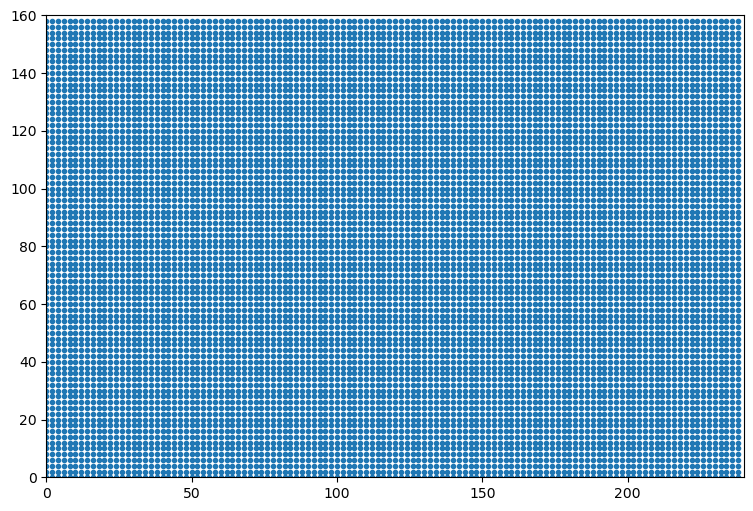

In [7]:
figure(figsize=(9,6))
plot(mg.x_of_node, mg.y_of_node, '.')
xlim(0,240)
ylim(0,160)

In [8]:
len(z)

9600

In [9]:
z += 10.0 + 0.01*mg.x_of_node + 2.5*(mg.y_of_node//80) + 0.02*(mg.y_of_node-(mg.y_of_node//80)*80)
z

array([10.  , 10.02, 10.04, ..., 16.4 , 16.42, 16.44])

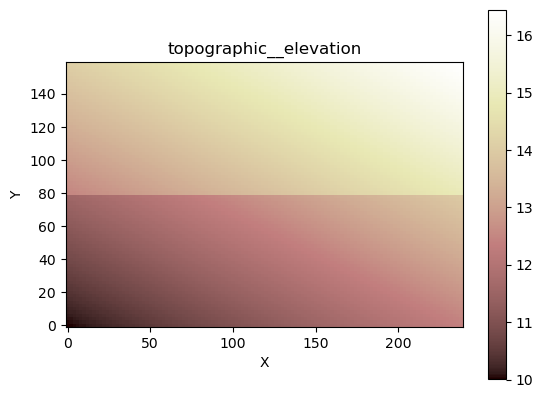

In [10]:
from landlab.plot.imshow import imshow_grid_at_node
imshow_grid_at_node(mg, 'topographic__elevation')

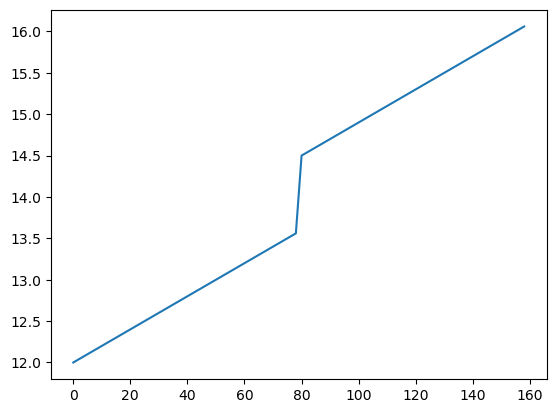

In [11]:
nodes = numpy.where(mg.x_of_node == 200)

desarrollorelieve = []
desarrollorelieve.append(z[nodes])
plt.plot(mg.y_of_node[nodes],z[nodes])

In [12]:
D = 0.01  # m2/yr transport coefficient
dt = 0.2 * mg.dx * mg.dx / D
dt

80.0

In [13]:
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

In [14]:
len(mg.core_nodes)

9204

In [15]:
qs = mg.add_zeros('link', 'sediment_flux')
for i in range(50):
    g = mg.calc_grad_at_link(z)
    qs[mg.active_links] = -D * g[mg.active_links]
    dqsdx = mg.calc_flux_div_at_node(qs)
    dzdt = -dqsdx
    z[mg.core_nodes] += dzdt[mg.core_nodes] * dt
    
    nodes = numpy.where(mg.x_of_node == 200)
    desarrollorelieve.append(z[nodes])

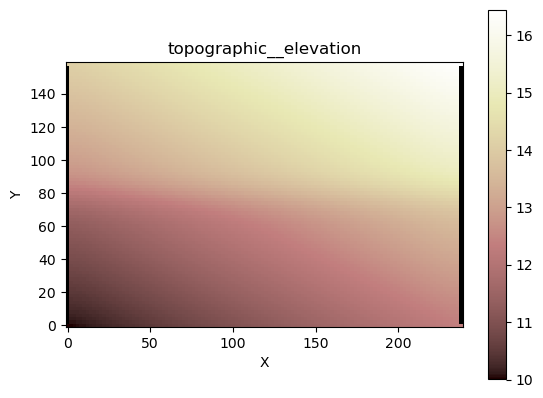

In [16]:
imshow_grid_at_node(mg, 'topographic__elevation')

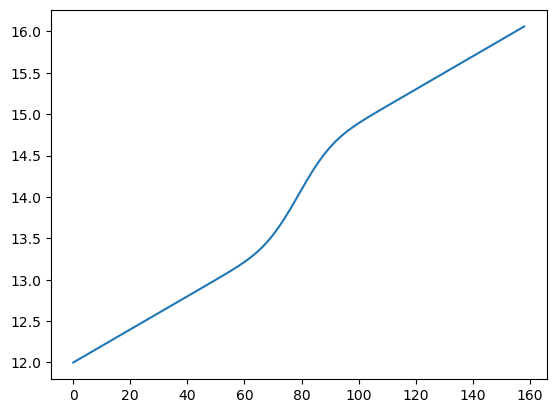

In [17]:
nodes = numpy.where(mg.x_of_node == 200)
plt.plot(mg.y_of_node[nodes],z[nodes])

In [18]:
from ipywidgets.widgets import *

def representarsuperficie(n):
    nodes = numpy.where(mg.x_of_node == 200)
    plt.plot(mg.y_of_node[nodes],desarrollorelieve[n])
 

#representarsuperficie(1)
interact(representarsuperficie,n=(0,49,5))

interactive(children=(IntSlider(value=20, description='n', max=49, step=5), Output()), _dom_classes=('widget-i…

<function __main__.representarsuperficie(n)>